<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/Credit_Trees_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df = pd.read_csv('CreditScoring.csv')

In [331]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [333]:
df.isna().sum()

,0
Status,0
Seniority,0
Home,0
Time,0
Age,0
Marital,0
Records,0
Job,0
Expenses,0
Income,0


In [334]:
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [335]:
df['Status'].value_counts()

,count
Status,
1,3200
2,1254
0,1


In [336]:
df = df[df['Status'] != 0]

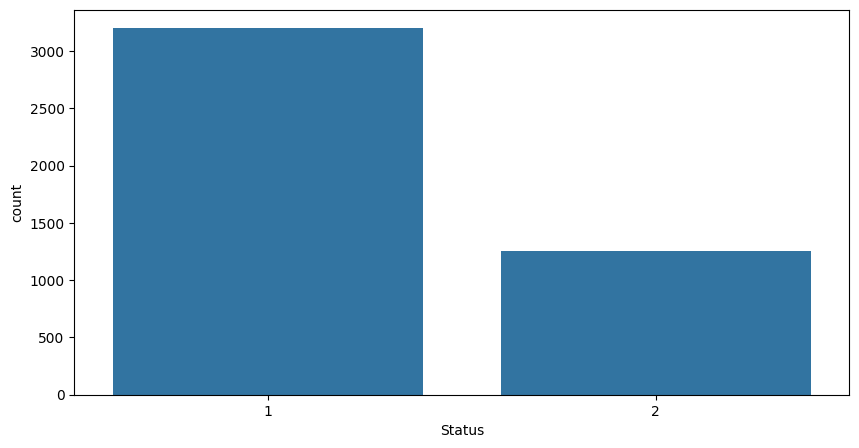

In [337]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Status', data=df)
plt.show()

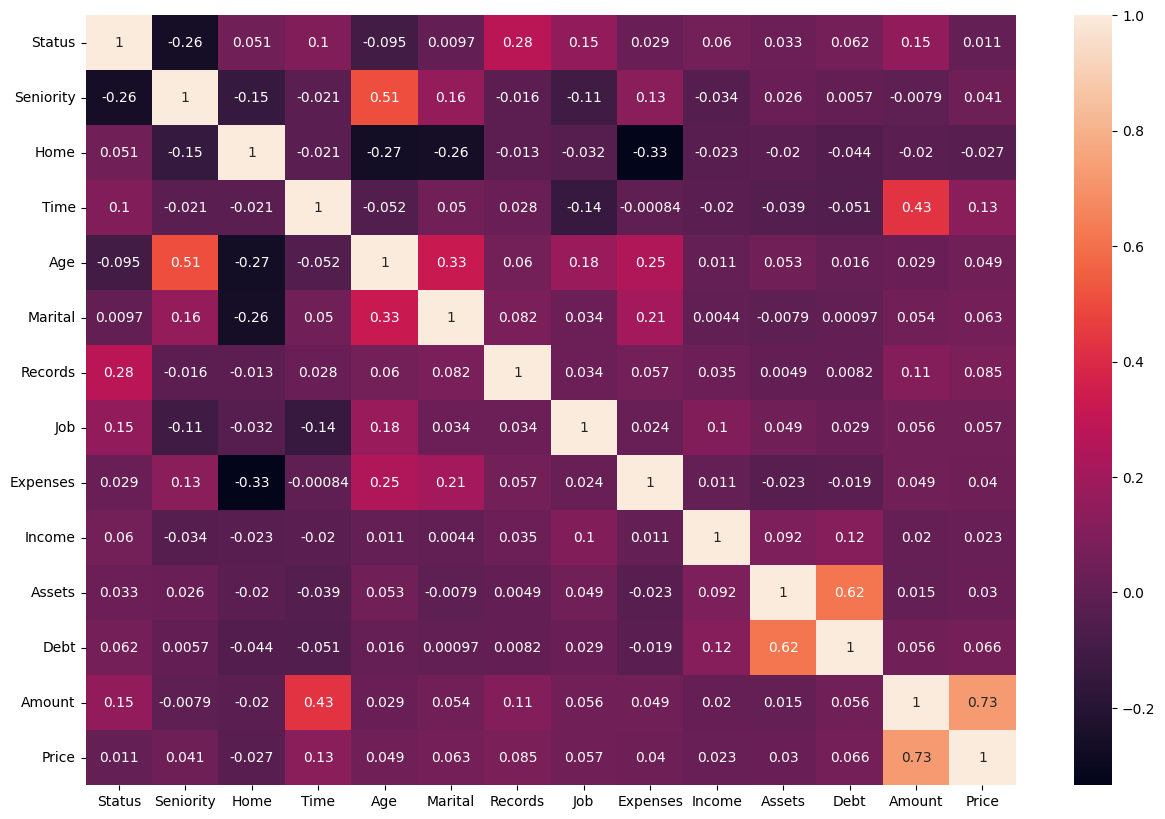

In [338]:
# corr heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [339]:
# select high corr
#selected_features = ['Seniority', 'Records', 'Amount', 'Job', 'Time', 'Debt', 'Income', 'Assets']
# final_features = ['Income', 'Seniority', 'Price', 'Age', 'Amount',
# 'Records', 'Assets']

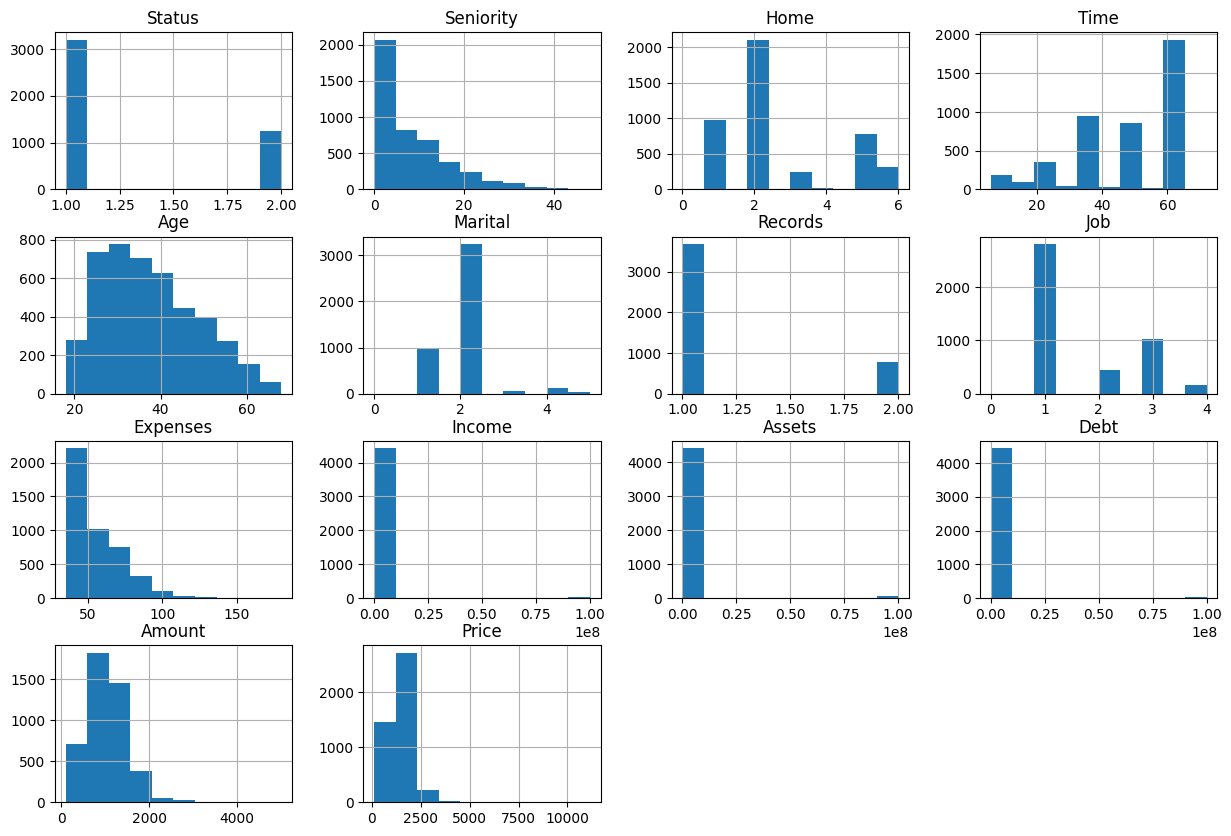

In [340]:
# distrubitons
df.hist(figsize=(15, 10))
plt.show()

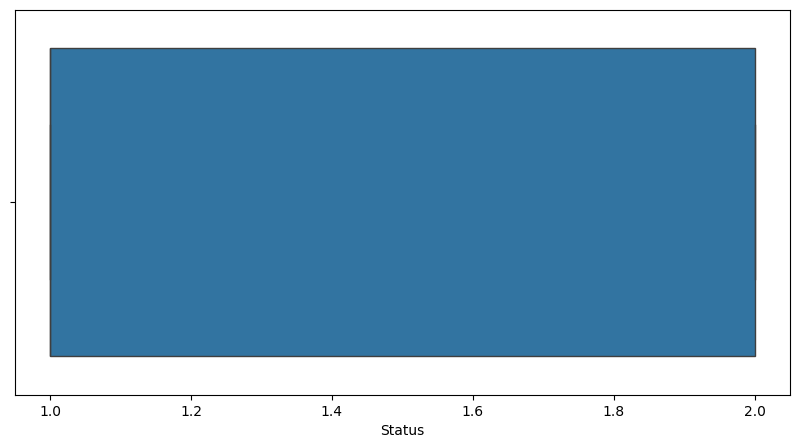

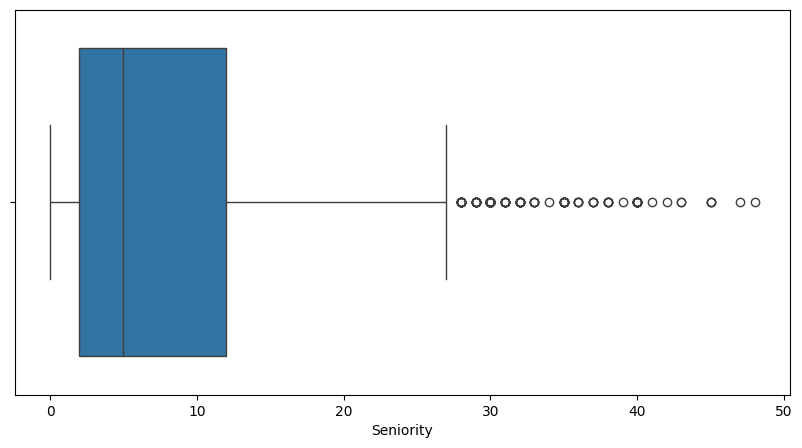

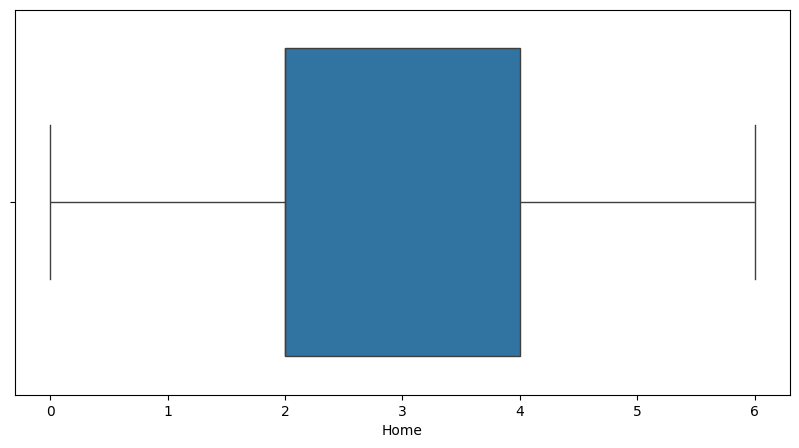

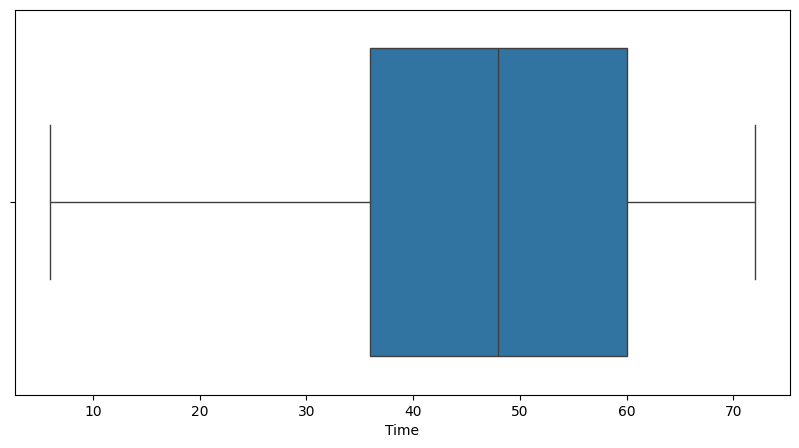

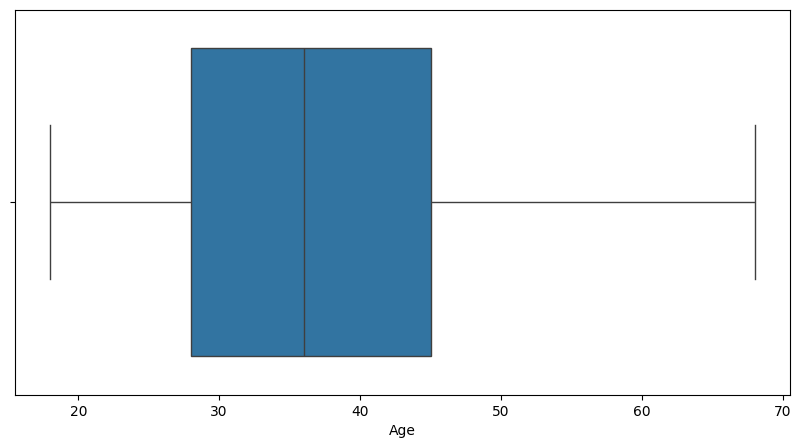

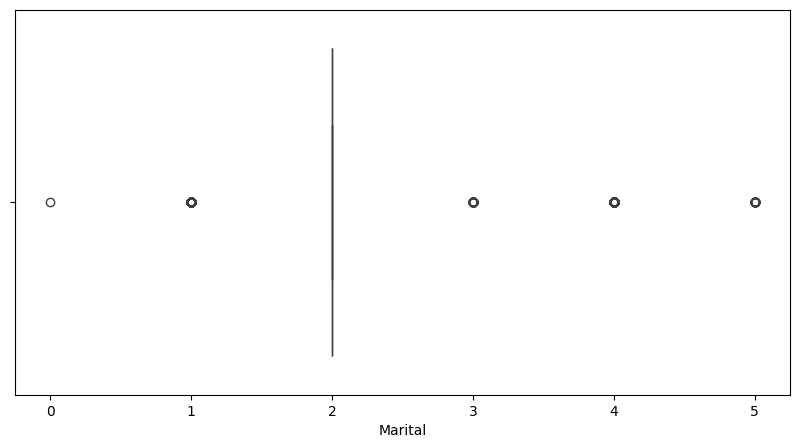

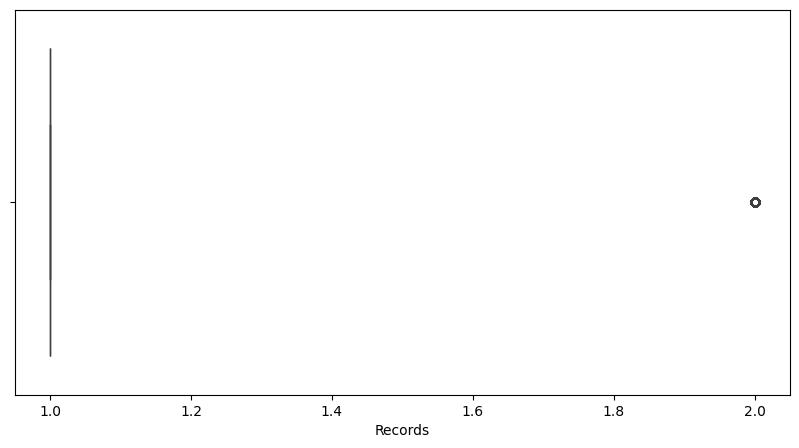

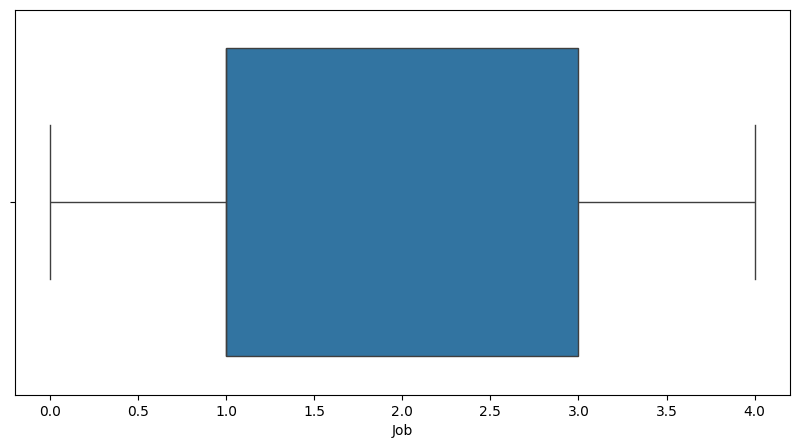

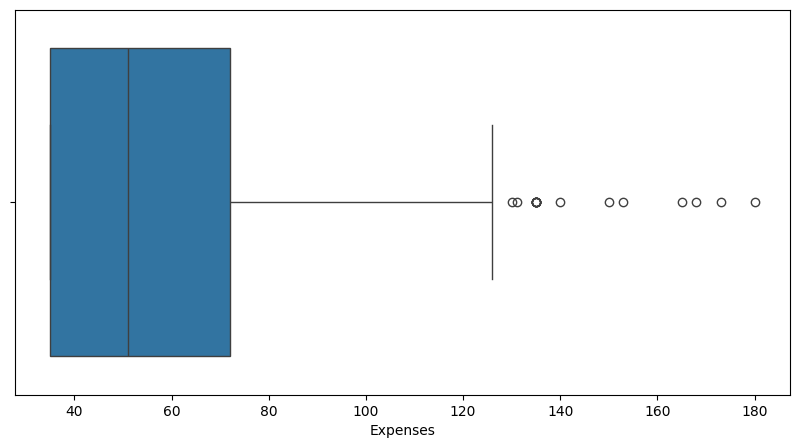

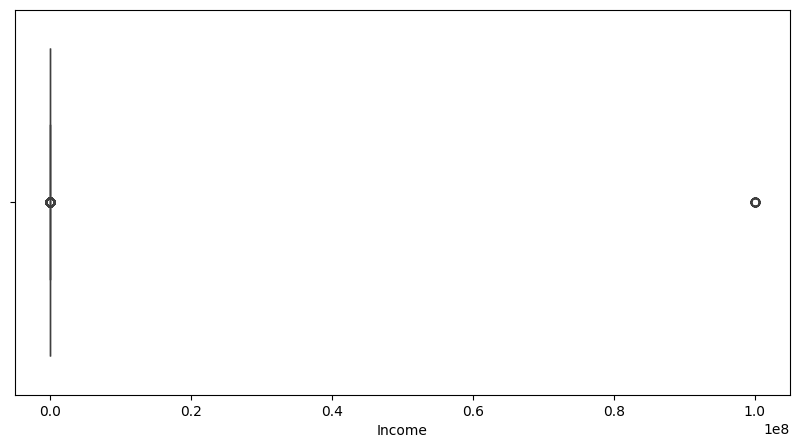

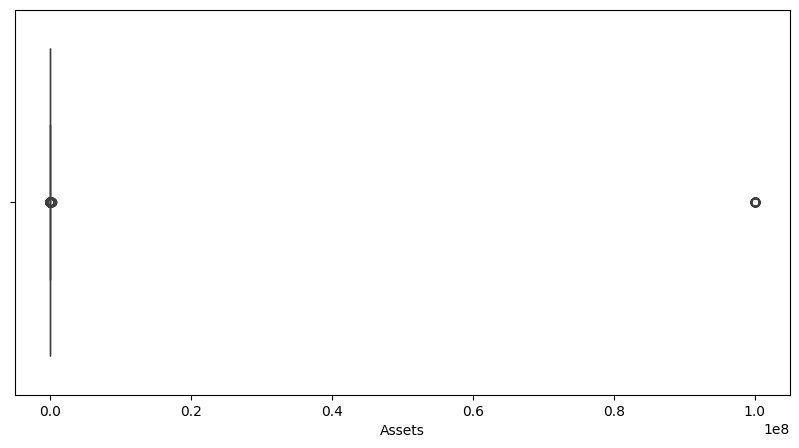

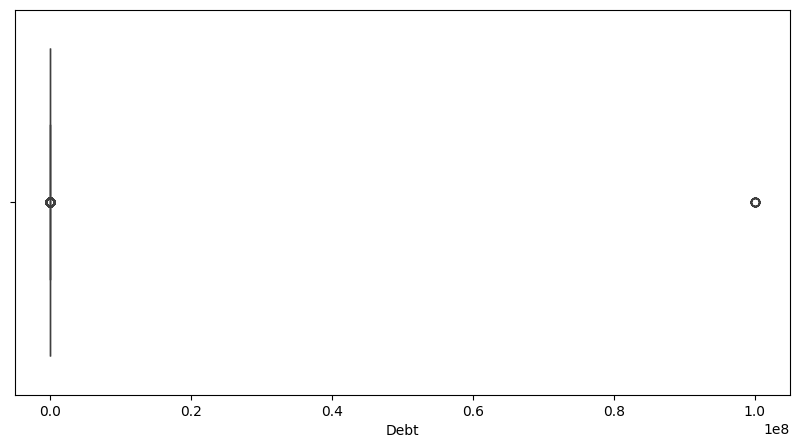

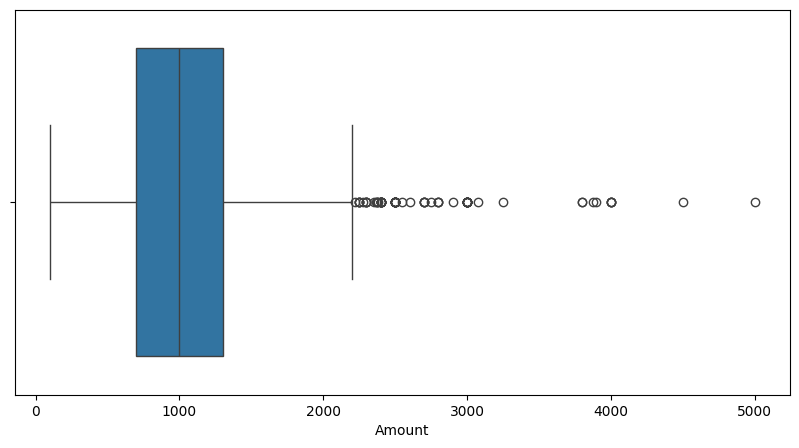

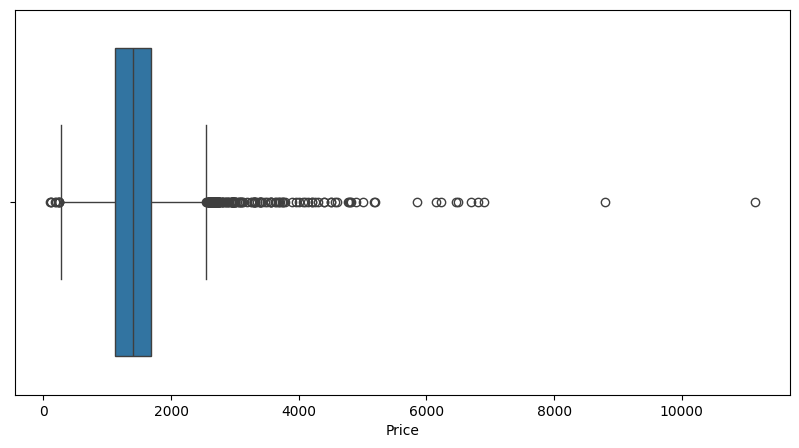

In [341]:
# box plots
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.show()

In [342]:
# Robust scaling
from sklearn.preprocessing import RobustScaler
df_scaled = df.copy()
scaler = RobustScaler()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df_scaled.iloc[:, 1:])

/tmp/ipython-input-342-1949115560.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.4  1.2  0.5 ... -0.5 -0.5  0. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, 1:] = scaler.fit_transform(df_scaled.iloc[:, 1:])
/tmp/ipython-input-342-1949115560.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5 -0.5  0.  ...  0.  -0.5  0. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, 1:] = scaler.fit_transform(df_scaled.iloc[:, 1:])
/tmp/ipython-input-342-1949115560.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.5  0.5 -0.5 ... -1.   0.   0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.il

In [343]:
# Transform Status into 0-1
df['Status'] = df['Status'].apply(lambda x: 1 if x == 2 else 0)

In [344]:
# split data
from sklearn.model_selection import train_test_split
# x = df_scaled[selected_features]
# x = df_scaled[final_features]
x = df_scaled.drop('Status', axis=1)

y = df['Status'] # Use the original 'Status' column as the target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [345]:
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve, roc_auc_score

In [346]:
# DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [347]:
y_pred = dt.predict(x_test)
roc_scores = {}
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       615
           1       0.56      0.52      0.54       276

    accuracy                           0.72       891
   macro avg       0.67      0.67      0.67       891
weighted avg       0.72      0.72      0.72       891



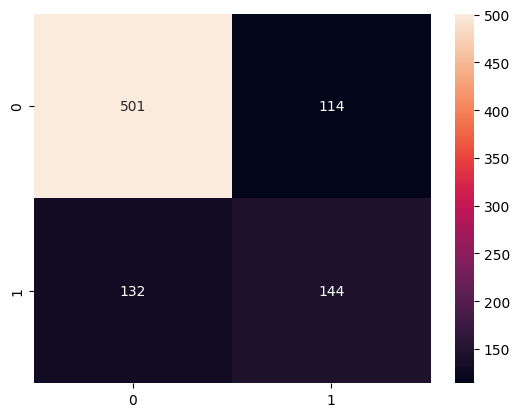

In [348]:
 # confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [349]:
roc_auc_score(y_test, y_pred)

np.float64(0.6681866383881231)

In [350]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [351]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       615
           1       0.72      0.44      0.55       276

    accuracy                           0.77       891
   macro avg       0.76      0.68      0.70       891
weighted avg       0.77      0.77      0.76       891



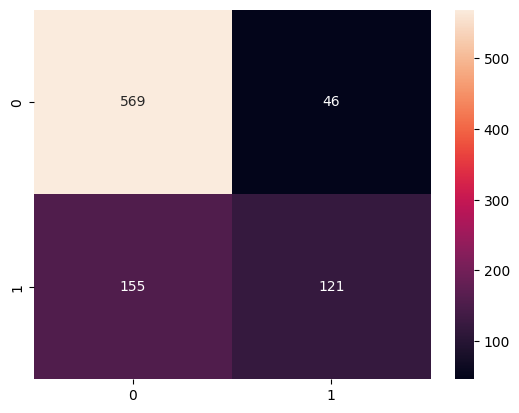

In [352]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [353]:
roc_auc_score(y_test, y_pred)

np.float64(0.6818045245669848)

In [354]:
# adaboosting
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)

In [355]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       615
           1       0.76      0.43      0.55       276

    accuracy                           0.78       891
   macro avg       0.78      0.69      0.71       891
weighted avg       0.78      0.78      0.76       891



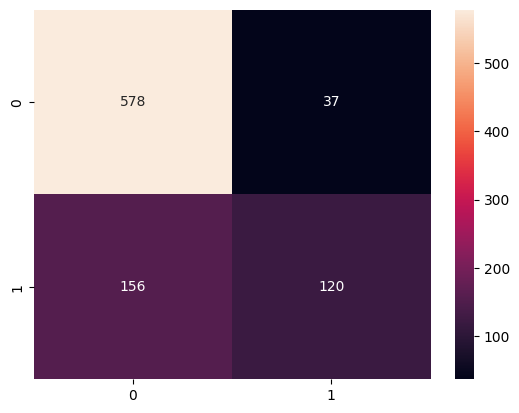

np.float64(0.687310003534818)

In [356]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
roc_auc_score(y_test, y_pred)

In [358]:
# Xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [359]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       615
           1       0.70      0.49      0.57       276

    accuracy                           0.78       891
   macro avg       0.75      0.70      0.71       891
weighted avg       0.77      0.78      0.76       891



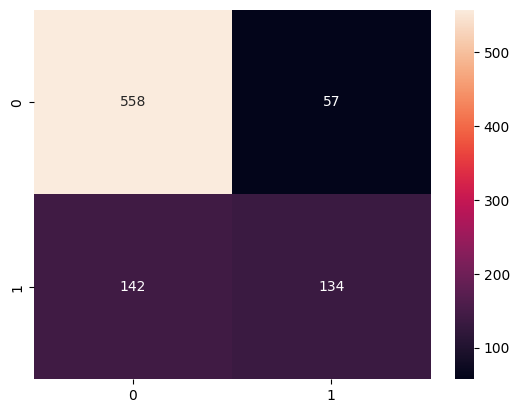

np.float64(0.6964121597737717)

In [360]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
roc_auc_score(y_test, y_pred)

In [361]:
# grid search
from sklearn.model_selection import GridSearchCV

Decision Tree with Grid Search
Best parameters found for DT:
{'max_depth': 5}
Best ROC AUC score for DT: 0.7637485311041543
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       615
           1       0.70      0.41      0.51       276

    accuracy                           0.76       891
   macro avg       0.74      0.66      0.68       891
weighted avg       0.75      0.76      0.74       891



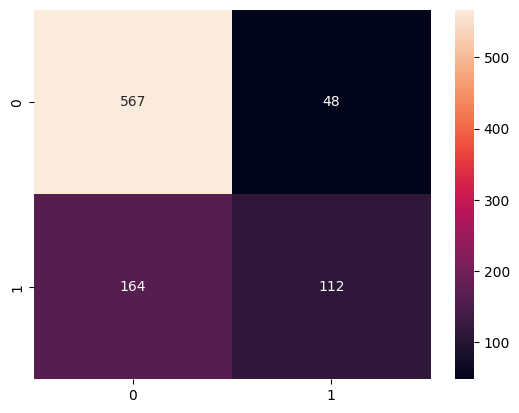

ROC AUC score on test set for DT: 0.6638741604807353


In [362]:
# DT with Grid Search
print("Decision Tree with Grid Search")
dt = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [3,5,7,10,20,30],
}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(x_train, y_train)

print("Best parameters found for DT:")
print(grid_search_dt.best_params_)
print("Best ROC AUC score for DT:", grid_search_dt.best_score_)

y_pred_dt_gs = grid_search_dt.predict(x_test)
print(classification_report(y_test, y_pred_dt_gs))
cm_dt_gs = confusion_matrix(y_test, y_pred_dt_gs)
sns.heatmap(cm_dt_gs, annot=True, fmt='d')
plt.show()
print("ROC AUC score on test set for DT:", roc_auc_score(y_test, y_pred_dt_gs))

In [363]:
param_grid = {
    'n_estimators': [10,20,50,100],
    'max_depth': [3,5,7,10,20,30],
}


Random Forest with Grid Search
Best parameters found for RF:
{'max_depth': 10, 'n_estimators': 100}
Best ROC AUC score for RF: 0.8334378792433503
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       615
           1       0.77      0.43      0.55       276

    accuracy                           0.78       891
   macro avg       0.78      0.68      0.70       891
weighted avg       0.78      0.78      0.76       891



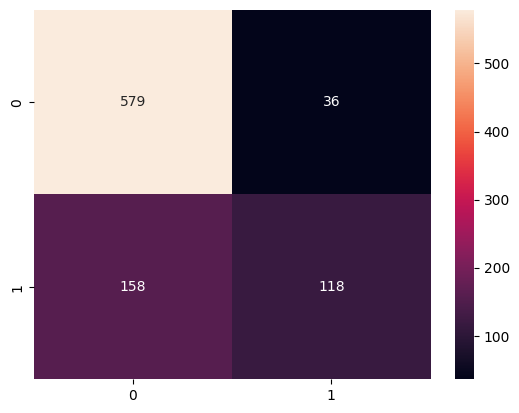

ROC AUC score on test set for RF: 0.6844998232591022


In [364]:
# Random Forest with Grid Search
print("\nRandom Forest with Grid Search")
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(x_train, y_train)

print("Best parameters found for RF:")
print(grid_search_rf.best_params_)
print("Best ROC AUC score for RF:", grid_search_rf.best_score_)

y_pred_rf_gs = grid_search_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf_gs))
cm_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)
sns.heatmap(cm_rf_gs, annot=True, fmt='d')
plt.show()
print("ROC AUC score on test set for RF:", roc_auc_score(y_test, y_pred_rf_gs))


AdaBoosting with Grid Search
Best parameters found for AdaBoost:
{'learning_rate': 1.0, 'n_estimators': 200}
Best ROC AUC score for AdaBoost: 0.8280513306349173
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       615
           1       0.79      0.45      0.58       276

    accuracy                           0.79       891
   macro avg       0.79      0.70      0.72       891
weighted avg       0.79      0.79      0.77       891



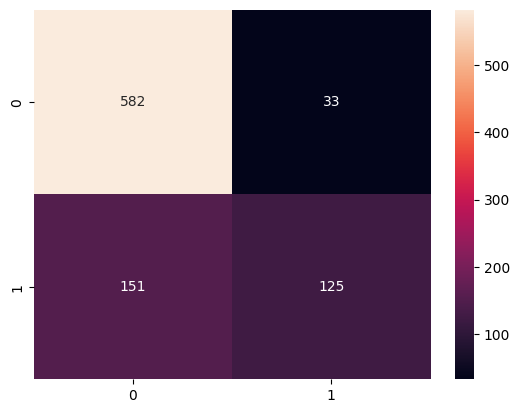

ROC AUC score on test set for AdaBoost: 0.6996200070696359


In [365]:
# AdaBoosting with Grid Search
print("\nAdaBoosting with Grid Search")
ab = AdaBoostClassifier()
param_grid_ab = {
    'n_estimators': [10,20,50,100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, scoring='roc_auc')
grid_search_ab.fit(x_train, y_train)

print("Best parameters found for AdaBoost:")
print(grid_search_ab.best_params_)
print("Best ROC AUC score for AdaBoost:", grid_search_ab.best_score_)

y_pred_ab_gs = grid_search_ab.predict(x_test)
print(classification_report(y_test, y_pred_ab_gs))
cm_ab_gs = confusion_matrix(y_test, y_pred_ab_gs)
sns.heatmap(cm_ab_gs, annot=True, fmt='d')
plt.show()
print("ROC AUC score on test set for AdaBoost:", roc_auc_score(y_test, y_pred_ab_gs))


XGBoost with Grid Search
Best parameters found for XGBoost:
{'max_depth': 3, 'n_estimators': 50}
Best ROC AUC score for XGBoost: 0.8319687101146067
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       615
           1       0.76      0.47      0.58       276

    accuracy                           0.79       891
   macro avg       0.78      0.70      0.72       891
weighted avg       0.79      0.79      0.77       891



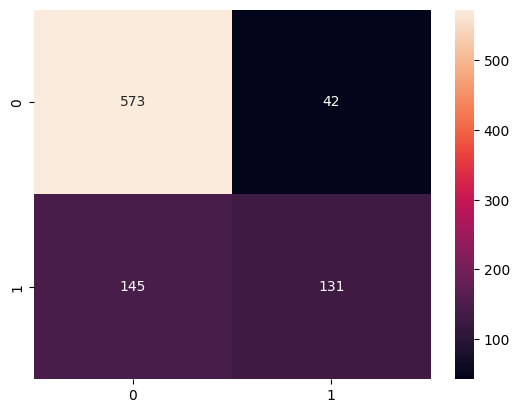

ROC AUC score on test set for XGBoost: 0.7031724991162955


In [366]:
# XGBoost with Grid Search
print("\nXGBoost with Grid Search")
param_grid_xgb = {
    'n_estimators': [10,20,50,100, 200],
    'max_depth': [3,5,7,10,20,30],
    'learning_rate': [0.01, 0.1, 1.0],
}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search_xgb.fit(x_train, y_train)

print("Best parameters found for XGBoost:")
print(grid_search_xgb.best_params_)
print("Best ROC AUC score for XGBoost:", grid_search_xgb.best_score_)

y_pred_xgb_gs = grid_search_xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb_gs))
cm_xgb_gs = confusion_matrix(y_test, y_pred_xgb_gs)
sns.heatmap(cm_xgb_gs, annot=True, fmt='d')
plt.show()
print("ROC AUC score on test set for XGBoost:", roc_auc_score(y_test, y_pred_xgb_gs))

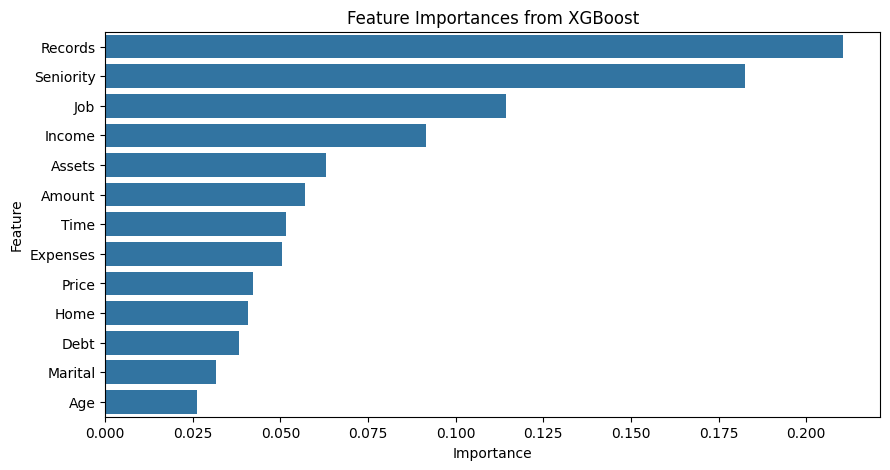

In [367]:
# Feature importance for xgboost grid search
importances = grid_search_xgb.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns
importances_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [368]:
# try smote to handle imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_smote.value_counts())

Status
0    2585
1     978
Name: count, dtype: int64
Status
0    2585
1    2585
Name: count, dtype: int64


In [369]:
xgb = XGBClassifier()
xgb.fit(x_train_smote, y_train_smote)
y_pred = xgb.predict(x_test)

In [370]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       615
           1       0.68      0.55      0.61       276

    accuracy                           0.78       891
   macro avg       0.75      0.72      0.73       891
weighted avg       0.77      0.78      0.78       891



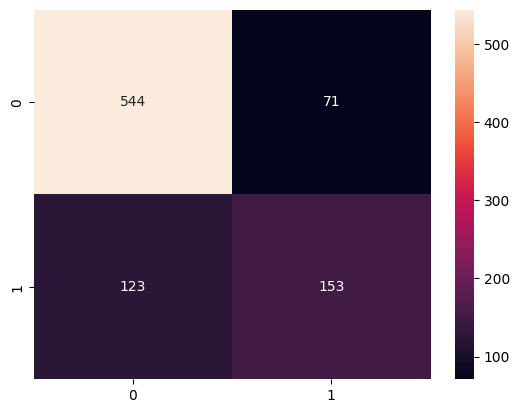

np.float64(0.7194503358077059)

In [371]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
roc_auc_score(y_test, y_pred)

In [372]:
# try class weight with xgboost
ratio_majority = y_train.value_counts()[0] / len(y_train)
minority = y_train.value_counts()[1] / len(y_train)
print(ratio_majority, minority)
# Correctly initialize XGBClassifier with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=ratio_majority/minority, eval_metric='aucpr')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

0.7255122088127982 0.2744877911872018


In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       615
           1       0.66      0.59      0.62       276

    accuracy                           0.78       891
   macro avg       0.74      0.73      0.73       891
weighted avg       0.77      0.78      0.78       891



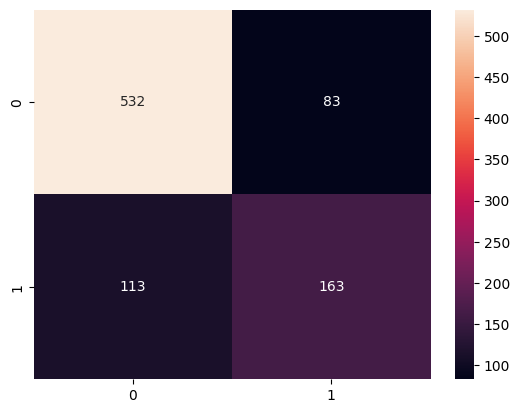

np.float64(0.7278101802757158)

In [374]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
roc_auc_score(y_test, y_pred)

In [375]:
# try balanced RF
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(x_train, y_train)
y_pred = brf.predict(x_test)

In [376]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       615
           1       0.64      0.67      0.65       276

    accuracy                           0.78       891
   macro avg       0.74      0.75      0.75       891
weighted avg       0.78      0.78      0.78       891



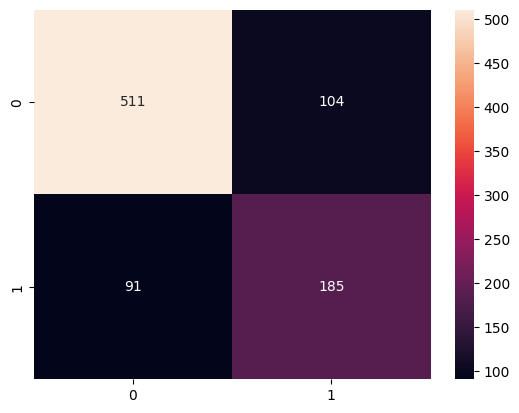

np.float64(0.7505920820077766)

In [377]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
roc_auc_score(y_test, y_pred)